# Basic Movie Recommendation
This is a beginner-friendly Movie designed to help you understand the fundamentals of how recommendation engines work.

The dataset used in this project is sourced from Kaggle:
"asaniczka/tmdb-movies-dataset-2023-930k-movies"

This project is intended for educational purposes only.

##  Data Preprocessing

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")

print("Path to dataset files:", path)

100%|██████████| 214M/214M [00:01<00:00, 140MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/561


In [2]:
import os
csv_path = os.path.join(path, "TMDB_movie_dataset_v11.csv")

In [3]:
import pandas as pd
df = pd.read_csv(csv_path)
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218235,773059,Pärchentausch - Swingerurlaub in den bayerisch...,0.000,0,Released,2019-08-28,0,0,True,NaN,...,Pärchentausch - Swingerurlaub in den bayerisch...,NaN,0.600,/clGQonK3Tyray6IV01zBQ4S8rEP.jpg,NaN,NaN,Blue Movie,Germany,German,NaN
1218236,773060,Humanity's Wing,0.000,0,Released,NaN,0,8,False,NaN,...,Humanity's Wing,On the day the prototypes for Trump’s border w...,0.600,/yS4JUsXUcmR19MQ0MyRPtiJShZr.jpg,They see it. What they need to know could be r...,NaN,Rubbing Stone Films,NaN,NaN,NaN
1218237,773061,Because Time,0.000,0,Released,NaN,0,3,False,NaN,...,Because Time,"I am a time traveler, mapping an imaginary uni...",0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218238,773062,Alaska,0.000,0,Released,2020-10-31,0,48,False,NaN,...,Alaska,Alaska (named after one of the many home movie...,0.600,NaN,Alaska is a dreamlike experimental musical mad...,NaN,Sacred Ash Studios,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [5]:
df.drop(columns=["id","status","revenue","backdrop_path","budget","homepage","imdb_id","original_title","poster_path","spoken_languages"],inplace=True)

In [6]:
df

,title,vote_average,vote_count,release_date,runtime,adult,original_language,overview,popularity,tagline,genres,production_companies,production_countries,keywords
0,Inception,8.364,34495,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,8.417,32571,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America","rescue, future, spacecraft, race against time,..."
2,The Dark Knight,8.512,30619,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,7.573,29815,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","future, society, culture clash, space travel, ..."
4,The Avengers,7.710,29166,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218235,Pärchentausch - Swingerurlaub in den bayerisch...,0.000,0,2019-08-28,0,True,de,NaN,0.600,NaN,NaN,Blue Movie,Germany,NaN
1218236,Humanity's Wing,0.000,0,NaN,8,False,en,On the day the prototypes for Trump’s border w...,0.600,They see it. What they need to know could be r...,NaN,Rubbing Stone Films,NaN,NaN
1218237,Because Time,0.000,0,NaN,3,False,en,"I am a time traveler, mapping an imaginary uni...",0.600,NaN,NaN,NaN,NaN,NaN
1218238,Alaska,0.000,0,2020-10-31,48,False,en,Alaska (named after one of the many home movie...,0.600,Alaska is a dreamlike experimental musical mad...,NaN,Sacred Ash Studios,NaN,NaN


In [44]:
df_filtered = df[(df["vote_average"]>= 5) & (df["vote_count"] > 1000) & (df["runtime"] > 10)]
df_filtered

,title,vote_average,vote_count,release_date,runtime,adult,original_language,overview,popularity,tagline,genres,production_companies,production_countries,keywords,language_grouped
0,Inception,8.364,34495,2010-07-15,148,False,en,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","rescue, mission, dream, airplane, paris, franc...",en
1,Interstellar,8.417,32571,2014-11-05,169,False,en,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America","rescue, future, spacecraft, race against time,...",en
2,The Dark Knight,8.512,30619,2008-07-16,152,False,en,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","joker, sadism, chaos, secret identity, crime f...",en
3,Avatar,7.573,29815,2009-12-15,162,False,en,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","future, society, culture clash, space travel, ...",en
4,The Avengers,7.710,29166,2012-04-25,143,False,en,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"new york city, superhero, shield, based on com...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,Crocodile Dundee II,5.807,1003,1988-05-19,110,False,en,Australian outback expert protects his New Yor...,17.670,The world's favourite adventurer is back for m...,"Adventure, Comedy",Paramount,"Australia, United States of America","australia, new york city, crocodile, knife, ad...",en
3933,Teenage Mutant Ninja Turtles II: The Secret of...,6.057,1002,1991-03-22,88,False,en,The Turtles and the Shredder battle once again...,27.941,"Cowabunga, it's the new turtle movie.","Science Fiction, Adventure, Action, Comedy, Fa...","Orange Sky Golden Harvest, New Line Cinema, Mi...","Hong Kong, United States of America","new york city, martial arts, fight, crime figh...",en
3934,Shin Godzilla,7.089,1001,2016-07-29,120,False,ja,"When a massive, gilled monster emerges from th...",26.397,Reality (Japan) vs. Fiction (Godzilla),"Action, Science Fiction, Horror","Toho Pictures, Cine Bazar, TOHO",Japan,"japan, monster, bureaucracy, politics, giant m...",ja
3935,The Black Dahlia,5.621,1001,2006-09-15,121,False,en,"In 1940s Los Angeles, two former boxers-turned...",16.556,Inspired by the most notorious unsolved murder...,"Crime, Thriller, Drama","The Linson Company, Universal Pictures, Signat...","France, Germany, United States of America","pornography, observer, los angeles, california...",en


In [45]:
df_filtered["release_date"] = pd.to_datetime(df_filtered["release_date"])

<ipython-input-45-8b19d08dcf32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["release_date"] = pd.to_datetime(df_filtered["release_date"])


In [46]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 0 to 3936
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 3888 non-null   object        
 1   vote_average          3888 non-null   float64       
 2   vote_count            3888 non-null   int64         
 3   release_date          3888 non-null   datetime64[ns]
 4   runtime               3888 non-null   int64         
 5   adult                 3888 non-null   bool          
 6   original_language     3888 non-null   object        
 7   overview              3888 non-null   object        
 8   popularity            3888 non-null   float64       
 9   tagline               3608 non-null   object        
 10  genres                3888 non-null   object        
 11  production_companies  3884 non-null   object        
 12  production_countries  3886 non-null   object        
 13  keywords              3

In [47]:
df_filtered.dropna(inplace=True)

<ipython-input-47-df8674c3e697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3592 entries, 0 to 3936
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 3592 non-null   object        
 1   vote_average          3592 non-null   float64       
 2   vote_count            3592 non-null   int64         
 3   release_date          3592 non-null   datetime64[ns]
 4   runtime               3592 non-null   int64         
 5   adult                 3592 non-null   bool          
 6   original_language     3592 non-null   object        
 7   overview              3592 non-null   object        
 8   popularity            3592 non-null   float64       
 9   tagline               3592 non-null   object        
 10  genres                3592 non-null   object        
 11  production_companies  3592 non-null   object        
 12  production_countries  3592 non-null   object        
 13  keywords              3

In [49]:
def clean_tags(text):
    return ' '.join([word.strip().lower().replace("-", "").replace("_", "") for word in text.split(",")])
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [50]:
df_filtered['genres'] = df_filtered['genres'].apply(clean_tags)
df_filtered['keywords'] = df_filtered['keywords'].apply(clean_tags)
df_filtered['production_countries'] = df_filtered['production_countries'].apply(clean_tags)
df_filtered['production_companies'] = df_filtered['production_companies'].apply(clean_tags)

df_filtered['overview'] = df_filtered['overview'].apply(clean_text)
df_filtered['tagline'] = df_filtered['tagline'].apply(clean_text)

<ipython-input-50-7594a7498f22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['genres'] = df_filtered['genres'].apply(clean_tags)
<ipython-input-50-7594a7498f22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['keywords'] = df_filtered['keywords'].apply(clean_tags)
<ipython-input-50-7594a7498f22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [51]:
df_filtered

,title,vote_average,vote_count,release_date,runtime,adult,original_language,overview,popularity,tagline,genres,production_companies,production_countries,keywords,language_grouped
0,Inception,8.364,34495,2010-07-15,148,False,en,cobb a skilled thief who commits corporate esp...,83.952,your mind is the scene of the crime,action science fiction adventure,legendary pictures syncopy warner bros. pictures,united kingdom united states of america,rescue mission dream airplane paris france vir...,en
1,Interstellar,8.417,32571,2014-11-05,169,False,en,the adventures of a group of explorers who mak...,140.241,mankind was born on earth it was never meant t...,adventure drama science fiction,legendary pictures syncopy lynda obst productions,united kingdom united states of america,rescue future spacecraft race against time art...,en
2,The Dark Knight,8.512,30619,2008-07-16,152,False,en,batman raises the stakes in his war on crime w...,130.643,welcome to a world without rules,drama action crime thriller,dc comics legendary pictures syncopy isobel gr...,united kingdom united states of america,joker sadism chaos secret identity crime fight...,en
3,Avatar,7.573,29815,2009-12-15,162,False,en,in the 22nd century a paraplegic marine is dis...,79.932,enter the world of pandora,action adventure fantasy science fiction,dune entertainment lightstorm entertainment 20...,united states of america united kingdom,future society culture clash space travel spac...,en
4,The Avengers,7.710,29166,2012-04-25,143,False,en,when an unexpected enemy emerges and threatens...,98.082,some assembly required,science fiction action adventure,marvel studios,united states of america,new york city superhero shield based on comic ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,Crocodile Dundee II,5.807,1003,1988-05-19,110,False,en,australian outback expert protects his new yor...,17.670,the worlds favourite adventurer is back for mo...,adventure comedy,paramount,australia united states of america,australia new york city crocodile knife advent...,en
3933,Teenage Mutant Ninja Turtles II: The Secret of...,6.057,1002,1991-03-22,88,False,en,the turtles and the shredder battle once again...,27.941,cowabunga its the new turtle movie,science fiction adventure action comedy family,orange sky golden harvest new line cinema mira...,hong kong united states of america,new york city martial arts fight crime fighter...,en
3934,Shin Godzilla,7.089,1001,2016-07-29,120,False,ja,when a massive gilled monster emerges from the...,26.397,reality japan vs fiction godzilla,action science fiction horror,toho pictures cine bazar toho,japan,japan monster bureaucracy politics giant monst...,ja
3935,The Black Dahlia,5.621,1001,2006-09-15,121,False,en,in 1940s los angeles two former boxersturnedco...,16.556,inspired by the most notorious unsolved murder...,crime thriller drama,the linson company universal pictures signatur...,france germany united states of america,pornography observer los angeles california ne...,en


In [52]:
df_filtered['combined_features'] = (
    df_filtered['genres'] + ' ' +
    df_filtered['keywords'] + ' ' +
    df_filtered['production_companies'] + ' ' +
    df_filtered['production_countries'] + ' ' +
    df_filtered['overview'] + ' ' +
    df_filtered['tagline']
)

<ipython-input-52-e75bc72a25c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['combined_features'] = (


In [76]:
df_filtered = df_filtered.reset_index(drop=True)

## Data Visulazetion

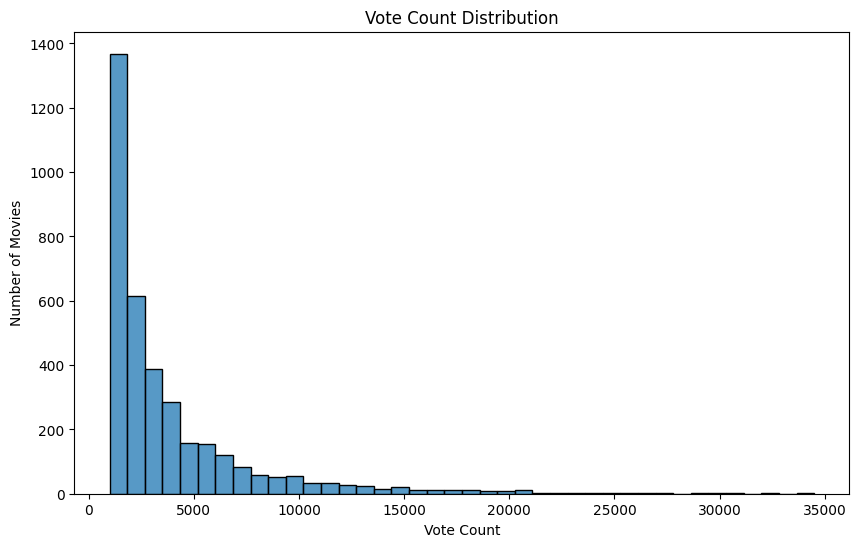

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_filtered['vote_count'], bins=40, kde=False)
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Number of Movies')
plt.show()

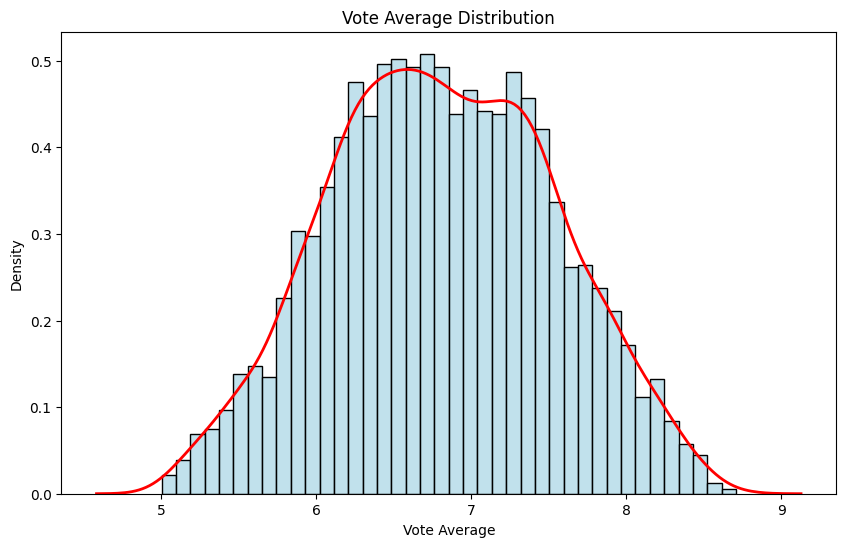

In [54]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['vote_average'], bins=40, color='lightblue', stat='density')
sns.kdeplot(df_filtered['vote_average'], color='red', linewidth=2)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Density')
plt.show()

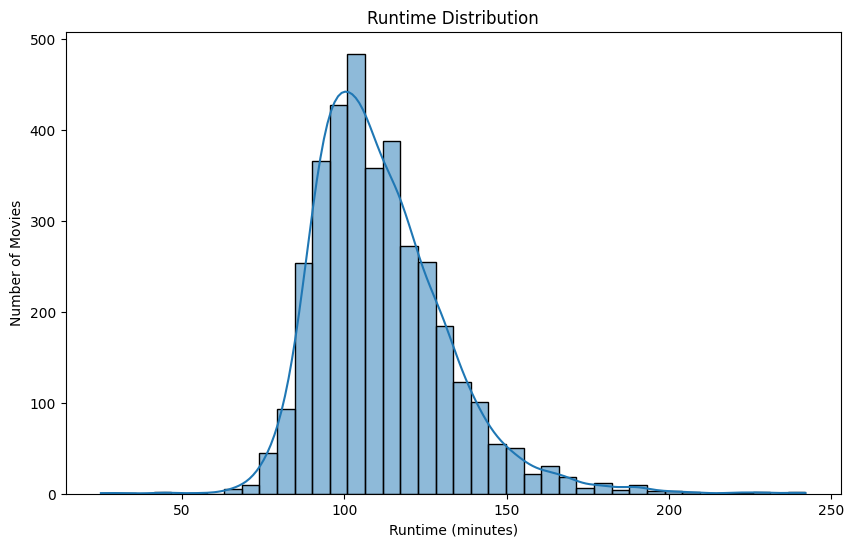

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['runtime'], bins=40, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

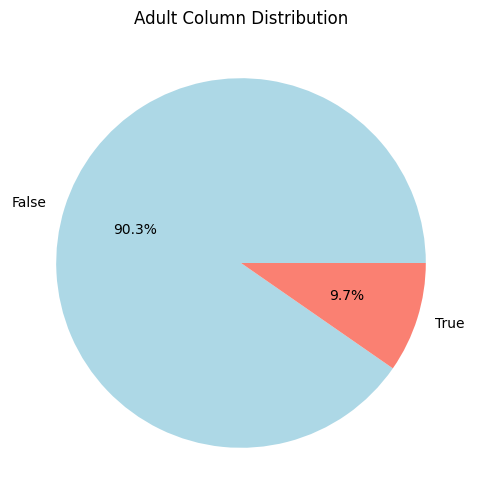

In [56]:
adult_counts = df['adult'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(adult_counts, labels=adult_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Adult Column Distribution')
plt.show()

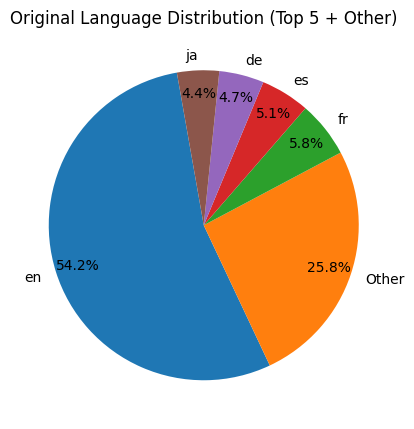

In [57]:
language_counts = df['original_language'].value_counts()
top_languages = language_counts.index[:5]
df['language_grouped'] = df['original_language'].apply(lambda x: x if x in top_languages else 'Other')
grouped_counts = df['language_grouped'].value_counts()
plt.figure(figsize=(5,8))
plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%', startangle=100,pctdistance=0.85)
plt.title('Original Language Distribution (Top 5 + Other)')
plt.show()

## Recommendation with only text based

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_filtered['combined_features'])

In [65]:
cosine_sim = cosine_similarity(tfidf_matrix)

In [66]:
def get_content_based_recommendations(title, df, similarity_matrix, top_n=5):
    title = title.lower()
    if title not in df['title'].str.lower().values:
        return f"Movie-TV Show no exist: {title}"

    idx = df[df['title'].str.lower() == title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return df[['title', 'vote_average', 'popularity']].iloc[movie_indices]

In [67]:
get_content_based_recommendations("Inception", df_filtered, cosine_sim)

,title,vote_average,popularity
16,The Matrix,8.206,78.564
3497,The Thirteenth Floor,7.023,17.974
1806,Kiss Kiss Bang Bang,7.181,16.312
354,Tenet,7.191,44.025
834,The Matrix Resurrections,6.479,52.143


In [68]:
get_content_based_recommendations("The Matrix", df_filtered, cosine_sim)

,title,vote_average,popularity
834,The Matrix Resurrections,6.479,52.143
332,The Matrix Revolutions,6.710,33.434
263,The Matrix Reloaded,7.039,44.605
2927,The Animatrix,7.184,25.345
3497,The Thirteenth Floor,7.023,17.974


In [70]:
get_content_based_recommendations("The Avengers", df_filtered, cosine_sim)

,title,vote_average,popularity
34,Guardians of the Galaxy Vol. 2,7.624,67.553
117,Captain Marvel,6.843,50.399
23,Avengers: Age of Ultron,7.276,96.565
36,Captain America: The First Avenger,6.995,43.665
451,Eternals,6.927,60.521


In [74]:
get_content_based_recommendations("Avatar", df_filtered, cosine_sim)

,title,vote_average,popularity
353,Aliens,7.933,49.209
150,Alien,8.147,72.767
1405,Battle: Los Angeles,5.732,39.331
1205,Planet of the Apes,5.729,33.651
827,Alien³,6.400,28.981


In [77]:
get_content_based_recommendations("The Black Dahlia", df_filtered, cosine_sim)

,title,vote_average,popularity
3184,CHiPS,6.127,19.257
2265,16 Blocks,6.424,18.368
2612,Barton Fink,7.453,18.404
3302,Home Again,6.118,13.053
3183,Strange Days,6.989,16.281


## Recommendation with text and numerical based


In [62]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [63]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_filtered['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix)

In [78]:
scaler = MinMaxScaler()
df_filtered[['vote_average_scaled', 'popularity_scaled']] = scaler.fit_transform(
    df_filtered[['vote_average', 'popularity']]
)

In [107]:
vote_component = np.tile(df_filtered['vote_average_scaled'].values[:, np.newaxis], (1, len(df_filtered)))
popularity_component = np.tile(df_filtered['popularity_scaled'].values[:, np.newaxis], (1, len(df_filtered)))

In [108]:
final_sim = (
    0.2 * cosine_sim +
    0.6 * df_filtered['vote_average_scaled'].values[:, np.newaxis] +
    0.2 * df_filtered['popularity_scaled'].values[:, np.newaxis]
)

In [114]:
scaler = MinMaxScaler()
final_sim_scaled = scaler.fit_transform(final_sim)

In [96]:
def get_hybrid_recommendations(title, df, similarity_matrix, top_n=5):
    title = title.lower()
    if title not in df['title'].str.lower().values:
        return f"Movie-TV Show no exist: {title}"

    idx = df[df['title'].str.lower() == title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return df[['title', 'vote_average', 'popularity']].iloc[movie_indices]

In [115]:
get_hybrid_recommendations("Inception", df_filtered, final_sim)

,title,vote_average,popularity
16,The Matrix,8.206,78.564
3225,The Thirteenth Floor,7.023,17.974
1730,Kiss Kiss Bang Bang,7.181,16.312
345,Tenet,7.191,44.025
809,The Matrix Resurrections,6.479,52.143


In [116]:
get_hybrid_recommendations("The Matrix", df_filtered, final_sim)

,title,vote_average,popularity
809,The Matrix Resurrections,6.479,52.143
323,The Matrix Revolutions,6.710,33.434
257,The Matrix Reloaded,7.039,44.605
2742,The Animatrix,7.184,25.345
3225,The Thirteenth Floor,7.023,17.974


In [117]:
get_hybrid_recommendations("The Avengers", df_filtered, final_sim)

,title,vote_average,popularity
34,Guardians of the Galaxy Vol. 2,7.624,67.553
115,Captain Marvel,6.843,50.399
23,Avengers: Age of Ultron,7.276,96.565
36,Captain America: The First Avenger,6.995,43.665
439,Eternals,6.927,60.521


In [118]:
get_hybrid_recommendations("The Black Dahlia", df_filtered, final_sim)

,title,vote_average,popularity
3184,CHiPS,6.127,19.257
2265,16 Blocks,6.424,18.368
2612,Barton Fink,7.453,18.404
3302,Home Again,6.118,13.053
3183,Strange Days,6.989,16.281


Hybrid and Content Based recommendations' results are similar. We can use different methods for vote_average to increase its effect using log etc. transformations.